# import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from helpers import parse_variables, get_risk_level, map_to_color

In [2]:
possible_scenarios = ['snp_effect',
             'linear_continuous',
             'non_linear_continuous',
             'discrete_global',
             'discrete_localized',
             'mix_linear_continuous',
             'mix_non_linear_continuous',
             'mix_discrete_global',
             'mix_discrete_localized']

In [3]:
scenarios = [f for f in os.listdir(f"data") if f in possible_scenarios]
scenarios

['snp_effect']

In [4]:
chosen_scenario = scenarios[0]

In [5]:
folders = [f for f in os.listdir(f"data/{chosen_scenario}") if f.startswith('G')]
folders

['G20_L20_c50_k1_M0.1_HWE1']

In [6]:
dfs = []
for folder in folders:
    scenarios = os.listdir(f"data/{chosen_scenario}/{folder}/pvals")
    for scenario in scenarios:
        risk = scenario.split('P_vals_risk_')[1].split('_noise_')[0]
        env_noise = scenario.split('_envnoise_')[1].split('_causalnoise_')[0]
        causal_noise = scenario.split('_causalnoise_')[1].split('_ratioeffect_')[0]
        ratio_effect = scenario.split('_ratioeffect_')[1].split('.pkl')[0]
        temp =pd.read_pickle(f"data/{chosen_scenario}/{folder}/pvals/{scenario}")
        computing_time = pd.read_pickle(f"data/{chosen_scenario}/complete_geno_{folder}_{causal_noise}_computingtimes.pkl")
        for tool in list(computing_time['tools']):
                result = computing_time.loc[computing_time['tools'] == tool, scenario.split('P_vals_')[1].split('.pkl')[0]].values[0]
                temp[f"time_{tool}"] = result
                temp['params'] = folder
                temp['risk'] = risk
                temp['causal_noise'] = causal_noise
                temp['env_noise'] = env_noise
                temp['ratio_effect'] = ratio_effect
        dfs.append(temp)

In [7]:
concatenated_df = pd.concat(dfs, ignore_index=True)
concatenated_df

,snp,coefs,AFs,-logP_best_corr,-logP_no_corr,-logP_abyss_via_true_pops,-logP_PCs,-logP_abyss_pq2pq_via_esti_pops,time_best_corr,params,risk,causal_noise,env_noise,ratio_effect,time_no_corr,time_abyss_via_true_pops,time_PCs,time_abyss_pq2pq_via_esti_pops
0,CG1,1.563058,0.27,24.924913,24.924913,24.924913,18.942303,16.954234,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.205,0.276,0.341,150.433
1,CG4,1.659054,0.25,25.825452,25.825452,25.825452,16.244354,17.261583,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.205,0.276,0.341,150.433
2,CG7,1.161981,0.46,21.070764,21.070764,21.070764,15.362444,13.337590,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.205,0.276,0.341,150.433
3,CG8,1.314905,0.41,22.809414,22.809414,22.809414,14.139321,14.573703,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.205,0.276,0.341,150.433
4,CG14,1.337968,0.41,25.868003,25.868003,25.868003,19.319724,18.875847,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.205,0.276,0.341,150.433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,RG179,0.094652,0.19,0.156747,0.156747,0.156747,0.173333,0.188779,0.349,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.01_ratioeff...,0.01,0.1,1,0.247,0.336,0.514,155.413
222,RG192,-0.140385,0.14,0.197935,0.197935,0.197935,0.113715,0.240567,0.349,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.01_ratioeff...,0.01,0.1,1,0.247,0.336,0.514,155.413
223,RG195,-0.002821,0.15,0.003382,0.003382,0.003382,0.177033,0.621735,0.349,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.01_ratioeff...,0.01,0.1,1,0.247,0.336,0.514,155.413
224,RG196,0.082179,0.16,0.129630,0.129630,0.129630,0.076398,0.038676,0.349,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.01_ratioeff...,0.01,0.1,1,0.247,0.336,0.514,155.413


In [8]:
relevant_cols = [f for f in list(concatenated_df.columns) if f.startswith('-logP')]

In [9]:
dfs = []
for col in relevant_cols:
    new_df = pd.DataFrame()
    new_df[['snp','coefs','AFs']] = concatenated_df[['snp','coefs','AFs']]
    new_df['perf'] = abs(concatenated_df[col] - concatenated_df['-logP_best_corr'])
    new_df['tool'] = col
    new_df['computing_time'] = concatenated_df[f"time_{col.split('-logP_')[1]}"]
    new_df[['params','risk','causal_noise','env_noise','ratio_effect']] = concatenated_df[['params','risk','causal_noise','env_noise','ratio_effect']]
    dfs.append(new_df)

In [10]:
df = pd.concat(dfs, ignore_index=True)
# Regular expression to capture the values for G, L, c, k, M, and HWE
df[['G', 'L', 'c', 'k', 'M', 'HWE']] = df['params'].str.extract(r'G(\d+)_L(\d+)_c(\d+)_k(\d+)_M([\d\.]+)_HWE(\d+)')

# Convert the extracted values to appropriate data types
df[['G', 'L', 'c', 'k', 'HWE']] = df[['G', 'L', 'c', 'k', 'HWE']].astype(int)
df['M'] = df['M'].astype(float)
df['nr_humans'] = df['c'] * df['k'] * df['k']
df['nr_snps'] = df['G'] * df['L'] * 1/2

In [11]:
df

,snp,coefs,AFs,perf,tool,computing_time,params,risk,causal_noise,env_noise,ratio_effect,G,L,c,k,M,HWE,nr_humans,nr_snps
0,CG1,1.563058,0.27,0.000000,-logP_best_corr,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,20,20,50,1,0.1,1,50,200.0
1,CG4,1.659054,0.25,0.000000,-logP_best_corr,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,20,20,50,1,0.1,1,50,200.0
2,CG7,1.161981,0.46,0.000000,-logP_best_corr,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,20,20,50,1,0.1,1,50,200.0
3,CG8,1.314905,0.41,0.000000,-logP_best_corr,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,20,20,50,1,0.1,1,50,200.0
4,CG14,1.337968,0.41,0.000000,-logP_best_corr,0.268,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,20,20,50,1,0.1,1,50,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,RG179,0.094652,0.19,0.032032,-logP_abyss_pq2pq_via_esti_pops,155.413,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.01_ratioeff...,0.01,0.1,1,20,20,50,1,0.1,1,50,200.0
1126,RG192,-0.140385,0.14,0.042632,-logP_abyss_pq2pq_via_esti_pops,155.413,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.01_ratioeff...,0.01,0.1,1,20,20,50,1,0.1,1,50,200.0
1127,RG195,-0.002821,0.15,0.618353,-logP_abyss_pq2pq_via_esti_pops,155.413,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.01_ratioeff...,0.01,0.1,1,20,20,50,1,0.1,1,50,200.0
1128,RG196,0.082179,0.16,0.090954,-logP_abyss_pq2pq_via_esti_pops,155.413,G20_L20_c50_k1_M0.1_HWE1,no_risk_envnoise_0.1_causalnoise_0.01_ratioeff...,0.01,0.1,1,20,20,50,1,0.1,1,50,200.0


In [12]:
max_finite_value = df['perf'].replace([np.inf, -np.inf], np.nan).max()
df['perf'] = df['perf'].replace(np.inf, max_finite_value)

In [13]:
change_name_risks = {
    "no_risk": "no environmental risk",
    "NW_risk": "Smooth linear North-West environmental risk",
    "N_risk" : "Smooth linear North environmental risk",
    "blob_risk": "Localised big blob risk",
    "center_risk": "Localised big central risk",
    "big_square_risk": "big square risk",
    "square_risk" : "Tiny square risk",
    'hi_square_risk' : "Tiny square risk",
    "hi_gauss_blob_risk": "Global Gaussian Risk",
    "two_square_risk": "Two tiny risks",
    "gauss_blob_risk" : "Gaussian Risk",
    "three_square_risk": "Three localized Risks",
    "mid_mid_square_risk": "Mid square risk"
}
change_name_tools = {
    '-logP_no_corr':'no correction',
    '-logP_best_corr': 'best correction',
    '-logP_true_pop': 'x/y axis of population grid',
    '-logP_abyss_via_true_pops': 'counted p2, 2pq and q2',
    '-logP_abyss_pq2pq_via_esti_pops': 'estimated p2, 2pq and q2',
    '-logP_combined': "combined Abyss estimation and PC'",
    '-logP_PCs': 'PCs'
}

In [14]:
# Assuming df is your DataFrame
# Replace values in the 'risk' column
df['risk'] = df['risk'].replace(change_name_risks)

# Replace values in the 'tools' column
df['tool'] = df['tool'].replace(change_name_tools)

# Now df will have the updated values in the 'risk' and 'tools' columns


In [15]:
df = df[df['tool'] != 'expected_logP']

In [16]:
# Ensure the AFs column is numeric
df['AFs'] = pd.to_numeric(df['AFs'], errors='coerce')

# Define the fixed points to which we want to round
fixed_points = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# Function to round each value in the AFs column to the nearest fixed point
def round_to_fixed_points(value):
    return fixed_points[np.abs(fixed_points - value).argmin()]

# Apply the rounding function to the AFs column and create a new column 'new_AFs'
df['new_AFs'] = df['AFs'].apply(lambda x: round_to_fixed_points(x) if not np.isnan(x) else np.nan)

In [17]:
dfs = []

for uniqueparam in df['params'].unique():
    print(uniqueparam)
    temp1 = df[df['params'] == uniqueparam]
    for uniquerisk in temp1['risk'].unique():
        temp2 = temp1[temp1['risk'] == uniquerisk]
        for uniquetool in temp2['tool'].unique():
            temp3 = temp2[temp2['tool'] == uniquetool]
            for uniquenoise in temp3['causal_noise'].unique():
                temp4 = temp3[temp3['causal_noise'] == uniquenoise]
                for uniquenoise_env in temp4['env_noise'].unique():
                    temp5 = temp4[temp4['env_noise'] == uniquenoise_env]
                    for uniqueratio in temp5['ratio_effect'].unique():
                        temp6 = temp5[temp5['ratio_effect'] == uniqueratio]
                        for unique_maf in temp6['new_AFs'].unique():
                            temp7 = temp6[temp6['new_AFs'] == unique_maf]
                           # Create a dictionary for the new row
                            new_row = {
                                'perf': temp6['perf'].mean(),
                                'computing_time': temp6['computing_time'].mean(),
                                'tool': uniquetool,
                                'risk': uniquerisk,
                                'causal_noise': uniquenoise,
                                'env_noise': uniquenoise_env,
                                'ratio_effect': uniqueratio,
                                'AFs': unique_maf,
                                'params': uniqueparam
                            }
                            
                            # Convert the dictionary into a DataFrame with one row and append it
                            new_df = pd.DataFrame([new_row])
                            dfs.append(new_df)

G20_L20_c50_k1_M0.1_HWE1


In [18]:
df = pd.concat(dfs, ignore_index=True)
df

,perf,computing_time,tool,risk,causal_noise,env_noise,ratio_effect,AFs,params
0,0.000000e+00,0.268,best correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.3,G20_L20_c50_k1_M0.1_HWE1
1,0.000000e+00,0.268,best correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.2,G20_L20_c50_k1_M0.1_HWE1
2,0.000000e+00,0.268,best correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.5,G20_L20_c50_k1_M0.1_HWE1
3,0.000000e+00,0.268,best correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.4,G20_L20_c50_k1_M0.1_HWE1
4,0.000000e+00,0.268,best correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.1,G20_L20_c50_k1_M0.1_HWE1
5,7.479397e-16,0.205,no correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.3,G20_L20_c50_k1_M0.1_HWE1
6,7.479397e-16,0.205,no correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.2,G20_L20_c50_k1_M0.1_HWE1
7,7.479397e-16,0.205,no correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.5,G20_L20_c50_k1_M0.1_HWE1
8,7.479397e-16,0.205,no correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.4,G20_L20_c50_k1_M0.1_HWE1
9,7.479397e-16,0.205,no correction,no_risk_envnoise_0.1_causalnoise_0.9_ratioeffe...,0.9,0.1,1,0.1,G20_L20_c50_k1_M0.1_HWE1


In [19]:
# Regular expression to capture the values for G, L, c, k, M, and HWE
df[['G', 'L', 'c', 'k', 'M', 'HWE']] = df['params'].str.extract(r'G(\d+)_L(\d+)_c(\d+)_k(\d+)_M([\d\.]+)_HWE(\d+)')

# Convert the extracted values to appropriate data types
df[['G', 'L', 'c', 'k', 'HWE']] = df[['G', 'L', 'c', 'k', 'HWE']].astype(int)
df['M'] = df['M'].astype(float)
df['nr_humans'] = df['c'] * df['k'] * df['k']
df['nr_snps'] = df['G'] * df['L'] * 1/2

In [20]:
df['risk'] = df['risk'].str.split('_envnoise').str[0]
df['risk'] = df['risk'].replace(change_name_risks)

df

,perf,computing_time,tool,risk,causal_noise,env_noise,ratio_effect,AFs,params,G,L,c,k,M,HWE,nr_humans,nr_snps
0,0.000000e+00,0.268,best correction,no environmental risk,0.9,0.1,1,0.3,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
1,0.000000e+00,0.268,best correction,no environmental risk,0.9,0.1,1,0.2,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
2,0.000000e+00,0.268,best correction,no environmental risk,0.9,0.1,1,0.5,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
3,0.000000e+00,0.268,best correction,no environmental risk,0.9,0.1,1,0.4,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
4,0.000000e+00,0.268,best correction,no environmental risk,0.9,0.1,1,0.1,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
5,7.479397e-16,0.205,no correction,no environmental risk,0.9,0.1,1,0.3,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
6,7.479397e-16,0.205,no correction,no environmental risk,0.9,0.1,1,0.2,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
7,7.479397e-16,0.205,no correction,no environmental risk,0.9,0.1,1,0.5,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
8,7.479397e-16,0.205,no correction,no environmental risk,0.9,0.1,1,0.4,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0
9,7.479397e-16,0.205,no correction,no environmental risk,0.9,0.1,1,0.1,G20_L20_c50_k1_M0.1_HWE1,20,20,50,1,0.1,1,50,200.0


In [21]:
def sorting_df(df, to_sort, sort_by):
    mean_perf = df.groupby(to_sort)[sort_by].mean()
    print(mean_perf)
    sorted_list = mean_perf.sort_values(ascending=False).index.tolist()
    return sorted_list

In [22]:
np.isinf(df['perf']).any()

False

In [23]:
df.groupby('tool')['perf'].mean()

tool
PCs                         3.144169e+00
best correction             0.000000e+00
counted p2, 2pq and q2      2.174358e-15
estimated p2, 2pq and q2    3.634053e+00
no correction               3.959598e-16
Name: perf, dtype: float64

tool
PCs                         3.144169e+00
best correction             0.000000e+00
counted p2, 2pq and q2      2.174358e-15
estimated p2, 2pq and q2    3.634053e+00
no correction               3.959598e-16
Name: perf, dtype: float64


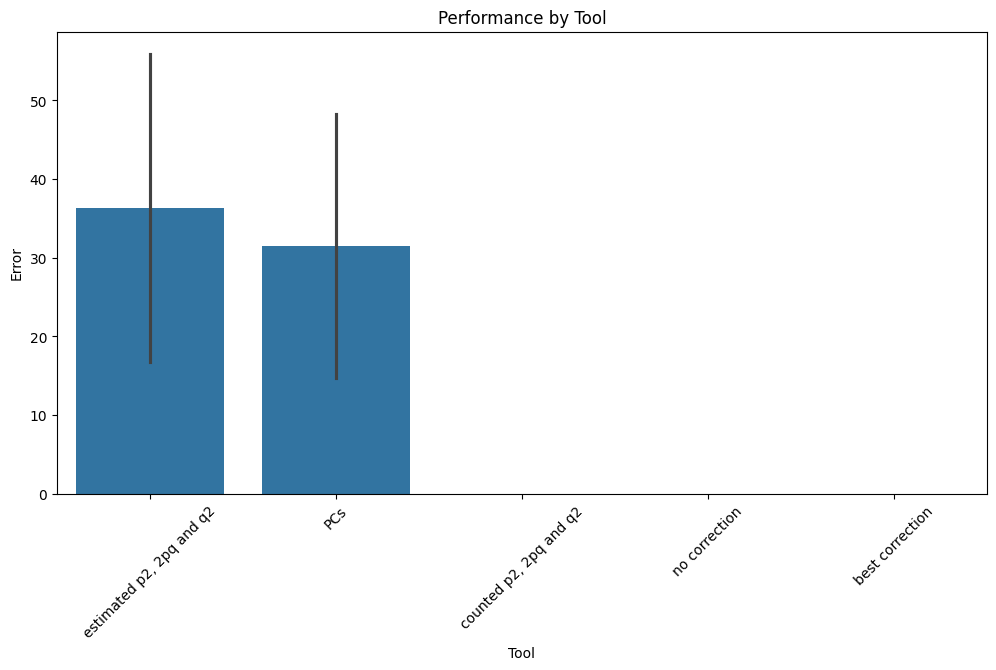

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                         3.144169e+00
best correction             0.000000e+00
counted p2, 2pq and q2      2.174358e-15
estimated p2, 2pq and q2    3.634053e+00
no correction               3.959598e-16
Name: perf, dtype: float64
causal_noise
0.01    0.142318
0.9     2.568971
Name: perf, dtype: float64


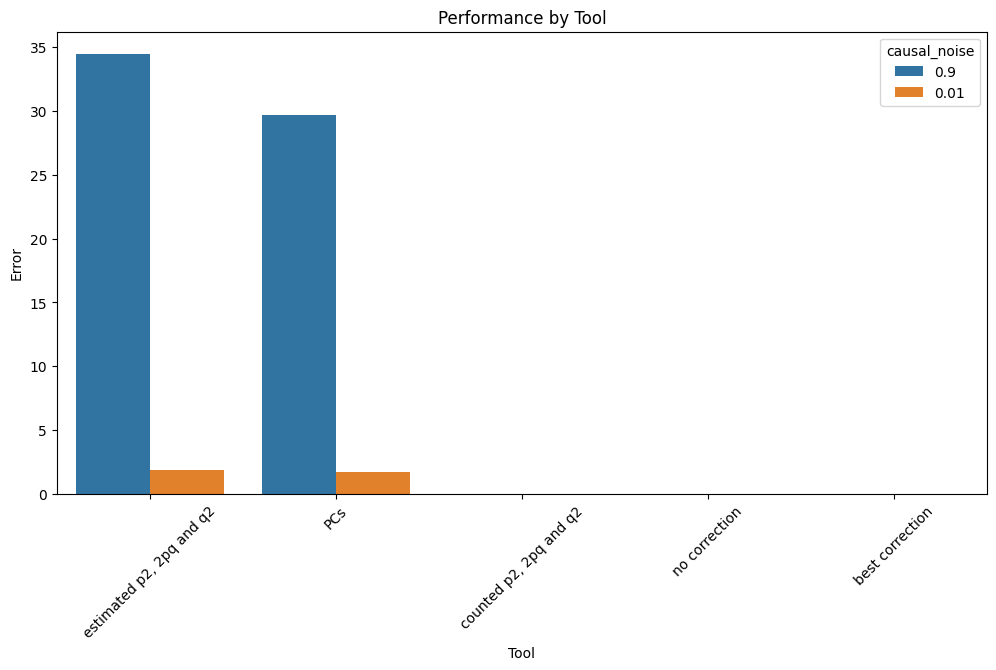

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'causal_noise',hue_order=sorting_df(to_use, 'causal_noise', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                         3.144169e+00
best correction             0.000000e+00
counted p2, 2pq and q2      2.174358e-15
estimated p2, 2pq and q2    3.634053e+00
no correction               3.959598e-16
Name: perf, dtype: float64
risk
no environmental risk    1.355644
Name: perf, dtype: float64


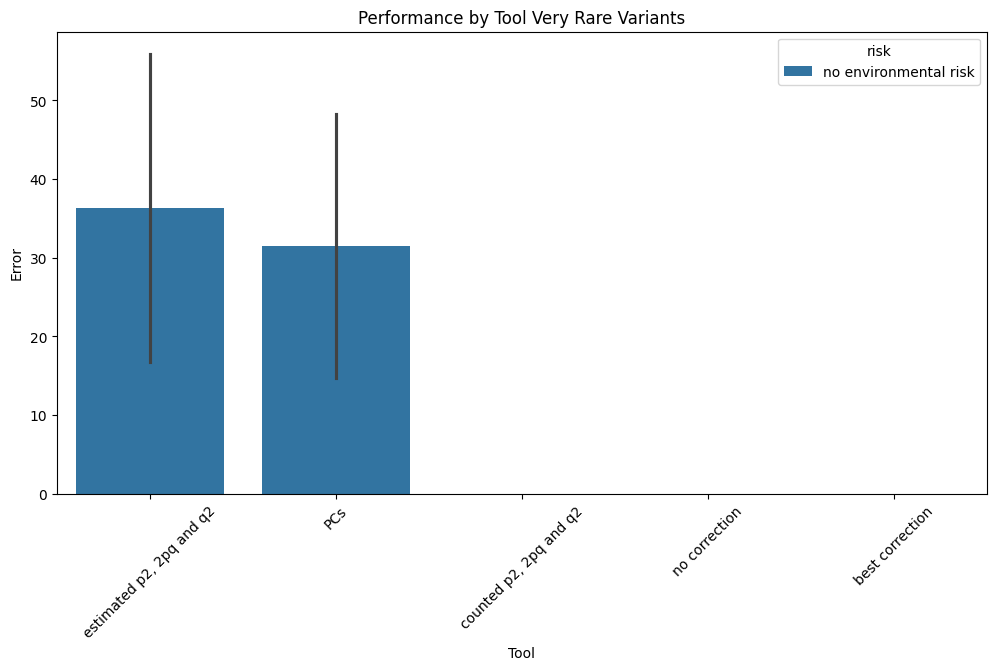

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'risk',hue_order=sorting_df(to_use, 'risk', 'perf'))

plt.title('Performance by Tool Very Rare Variants')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

tool
PCs                         3.144169e+00
best correction             0.000000e+00
counted p2, 2pq and q2      2.174358e-15
estimated p2, 2pq and q2    3.634053e+00
no correction               3.959598e-16
Name: perf, dtype: float64
AFs
0.1    1.355644
0.2    1.355644
0.3    1.355644
0.4    1.355644
0.5    1.355644
Name: perf, dtype: float64


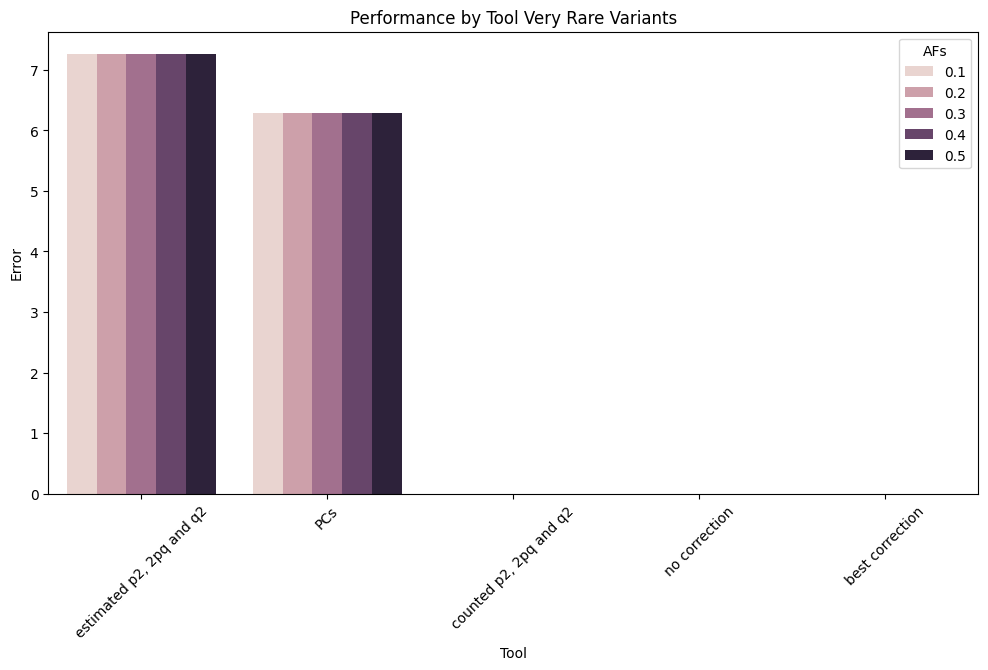

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = df.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'AFs',hue_order=sorting_df(to_use, 'AFs', 'perf'))

plt.title('Performance by Tool Very Rare Variants')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

to_use = result.copy()
# Assuming your data is loaded into a DataFrame `df`
# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Bar plot of performance (`perf`) by tool
plt.figure(figsize=(12, 6))
sns.barplot(x='tool', y='perf', data=to_use, errorbar=None, estimator=sum, order=sorting_df(to_use, 'tool', 'perf'), hue = 'M',hue_order=sorting_df(to_use, 'k', 'perf'))

plt.title('Performance by Tool')
plt.ylabel('Error')
plt.xlabel('Tool')
plt.xticks(rotation=45)
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'groupby'

<Figure size 1200x600 with 0 Axes>